<a href="https://colab.research.google.com/github/PrathameshKR/ML-projects/blob/main/ML-models/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/Wholesale customers data.csv')

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
#Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
pd.DataFrame(scaled_data).describe() #here scaled data is in numpy array format so we need to convert it to pandas dataframe

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [ ]:
#Creating Model

kmeans = KMeans(n_clusters=2,init='k-means++')
kmeans.fit(scaled_data)
kmeans.inertia_

2599.387384912305

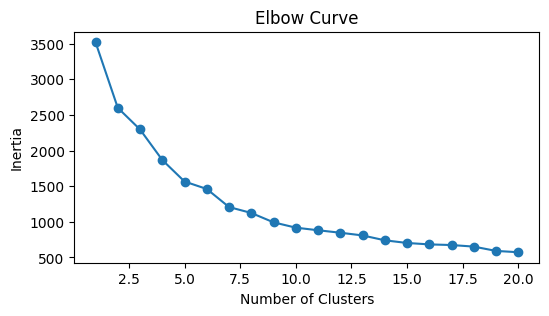

In [ ]:
#Calculating inertia for different values of k(i.e for different amount of clusters)
wcss = []

for k in range(1,21):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)


plt.figure(figsize= (6,3))
plt.plot(range(1,21), wcss ,marker='o')
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
#let's take elbow point as 6 ,hence k=6
kmeans = KMeans(n_clusters=6,init='k-means++')
kmeans.fit(scaled_data)
prediction = kmeans.predict(scaled_data)


data = pd.DataFrame(scaled_data)
data.head()

,0,1,2,3,4,5,6,7
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [ ]:
#now we need to assign datapoints to clusters in above table
data['cluster'] = prediction
data.head()

,0,1,2,3,4,5,6,7,cluster
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,5
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0


In [ ]:
data['cluster'].value_counts()

,count
cluster,
5,164
0,124
2,84
4,30
1,26
3,12


In [ ]:
#Creating a input system
def get_cluster_prediction():
  Channel = int(input("Enter Channel (eg. 1,2,3): "))
  Region = int(input("Enter Region (eg. 1,2,3):"))
  Fresh = float(input("Enter annual spending on Fresh products: "))
  Milk = float(input("Enter annual spending on milk: "))
  Grocery = float(input("Enter annual spending on grocery: "))
  Frozen = float(input("Enter annual spending on frozen products: "))
  Detergents_paper = float(input("Enter annual spending on detergents paper: "))
  Delicassen = float(input("Enter annual spending on delicassen: "))


  user_input_data = np.array([[Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_paper,Delicassen]])

#standardize input data
  user_scaled_data = scaler.transform(user_input_data)

#Predict cluster
  Predicted_Cluster = kmeans.predict(user_scaled_data)

  print("Customer belongs to cluster:",Predicted_Cluster[0])

In [ ]:
get_cluster_prediction(3)

Enter Channel (eg. 1,2,3): 1
Enter Region (eg. 1,2,3):3
Enter annual spending on Fresh products: 25456
Enter annual spending on milk: 9000
Enter annual spending on grocery: 2500
Enter annual spending on frozen products: 522
Enter annual spending on detergents paper: 250
Enter annual spending on delicassen: 255
Customer belongs to cluster: 5
